In [70]:
import pandas as pd
import numpy as np
import json as json
import tweepy
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [38]:
#Loading dataset
tweet_av_df = pd.read_csv('twitter-archive-enhanced-2.csv')
image_pred_df = pd.read_csv('image-predictions-3.tsv', sep='\t')

### Visual Assessement on Twitter archive content which contains basic tweet data ###
-----
For this project, key data assessement requirement for twitter archive data include original rating and there should be an image associated for the given rating.
- "expanded_urls" is associated with image urls for a given tweet.
- It is observed that the "expanded_urls" column does have missing or no values
- "rating_numerator" gives us insights into the given dog rating.
- "tweet_id" it unique identifier identifing each unique tweet for each dog.
- "timestamp" captures the date and time specifics when a direct message was posted to weratedogs
- 2356 records in twitter archive data set.



In [21]:
tweet_av_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Programmatic Assessment on Twitter archive content which contains basic tweet data ###

In [23]:
tweet_av_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
tweet_av_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [25]:
tweet_av_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
748,779377524342161408,NaN,NaN,2016-09-23 17:50:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779377524...,12,10,None,None,None,pupper,None
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676582956...,8,10,Vinnie,None,None,None,None
410,823322678127919110,NaN,NaN,2017-01-23 00:13:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He's got the fastest paws in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,None,None,None,None
907,757741869644341248,NaN,NaN,2016-07-26 00:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonard. He hides in bushes to escape ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757741869...,10,10,Leonard,None,None,None,None
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,None,None,None


In [26]:
tweet_av_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
tweet_av_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [31]:
tweet_av_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


### Assessment Findings on Twitter archive data set ###
------
** Data Quality Issues **


- Completeness: The following columns are incomplete - and have missing values. 
'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'.

- Consistency: 'in_reply_to_user_id', 'retweeted_status_user_id' (status ids are sometimes populated with user_id).

- Validity: 'rating_denominator' has 0 values in it. This will result in 0 rating for dogs.

- Erroneous data types: 'timestamp', 'retweeted_status_timestamp' has been set as object type.

- Erroneous data types: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id' should be int type.

- Accuracy: 'name' column has inaccurate values.








### Assessment on Image Predection Data set ###

Start with Visual assessment.


In [33]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
image_pred_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [35]:
image_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
402,673697980713705472,https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg,1,porcupine,0.151876,False,hen,0.111380,False,doormat,0.058934,False
1014,709566166965075968,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True
721,685973236358713344,https://pbs.twimg.com/media/CYURBGoWYAAKey3.jpg,1,Siberian_husky,0.450678,True,Eskimo_dog,0.430275,True,malamute,0.118590,True
1764,826476773533745153,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg,1,German_shepherd,0.741860,True,Tibetan_mastiff,0.122812,True,kelpie,0.100460,True
1268,749417653287129088,https://pbs.twimg.com/media/CmZ3YH9WEAAowi3.jpg,2,papillon,0.772894,True,Shetland_sheepdog,0.042408,True,collie,0.042313,True


In [36]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB



### Assessment Findings on Image Predictions data set ###
------
** Data Quality Issues **

- No data quality issues are found with this data set. The dataset is complete, consistent, valid with no accuracy issues.

### Fixing data quality issues with twitter archive data ###

Before I gather tweet data, I will clean the data quality issues that was found on twitter archive data. I do this so, I can use this cleaned dataset to query twitter api to get tweet related data.

In [39]:
# Fixing the 'timestamp' data quality issue. Converting object type to datetime64 with UTC timezone 
tweet_av_df['timestamp'] = pd.to_datetime(tweet_av_df['timestamp'], utc=True, errors='coerce')
tweet_av_df.timestamp.dtype

datetime64[ns, UTC]

In [40]:
# Fixing 'expanded_urls' data quality issue. Delete rows that have null values since we only want original tweet ratings that have images.
tweet_av_df = tweet_av_df.dropna(axis=0, subset=['expanded_urls'])
print('expanded urls has null values?', tweet_av_df.expanded_urls.isnull().values.any())

expanded urls has null values? False


In [41]:
# Fixing 'retweeted_status_id' data quality issue. We delete rows that have a value associated with retweeted_status_id since we only want original tweet ratings.
tweet_av_df = tweet_av_df.drop(tweet_av_df.loc[tweet_av_df.retweeted_status_id.notna()].index)
tweet_av_df.reset_index()
print('retweeted_status_id has a value?', tweet_av_df.retweeted_status_id.notna().any())


retweeted_status_id has a value? False


In [42]:
# Continue with 'retweeted_status_id' - since we are intrested with original tweets only, it is safe to drop this column since we are left with null values in this column.
tweet_av_df.drop(axis=1, columns=['retweeted_status_id'], inplace=True)


In [43]:
# 'retweeted_status_user_id' column can also be dropped since we are also left with null values. Keeping the original question in mind.
tweet_av_df.drop(axis=1, columns=['retweeted_status_user_id'], inplace=True)

In [44]:
# 'retweeted_status_timestamp' column can also be dropped since we are also left with null values. Keeping the original question in mind.
tweet_av_df.drop(axis=1, columns=['retweeted_status_timestamp'], inplace=True)

In [45]:
# 'in_reply_to_status_id' column can be dropped, since we are not really looking at tweets that were in reply.
tweet_av_df.drop(axis=1, columns=['in_reply_to_status_id'], inplace=True)

In [46]:
# 'in_reply_to_user_id' column can be dropped too, since we are not really looking at tweets that were in reply.
tweet_av_df.drop(axis=1, columns=['in_reply_to_user_id'], inplace=True)

In [47]:
# Taking a peek at tweet dataframe after fixing the data quality issues.
tweet_av_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

Before we proceed with data tidy tasks., we will check the min and max timestamps of teets as we are not required to gather the tweets beyond August 1st, 2017.

In [48]:
# What is the min and max datetime from our teet dataset.
print(tweet_av_df.timestamp.min(), tweet_av_df.timestamp.max())

2015-11-15 22:32:08+00:00 2017-08-01 16:23:56+00:00


In [52]:

# A function to collect tweet json data using twitter api and save it to json file.
def collecttweetdata(tweet_ids):
    consumer_key = 'AeFxgKcFhsENzkKD8MfoMPoA9'
    consumer_secret = 'PErJwUZAwfmLBzZKyWBNwOpprGbUNsrro167rBYZ04JmzqmSqx'
    
    auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json_latest.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweetjson = api.get_status(tweet_id, tweet_mode="extended")
                print("Success")
                json.dump(tweetjson._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail", e)
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [53]:
# Lets collect tweet data and save to tweets data json file.
tweet_ids = tweet_av_df.tweet_id.values
#collecttweetdata(tweet_ids)

764513869611008
Success
1533: 678755239630127104
Success
1534: 678740035362037760
Success
1535: 678708137298427904
Success
1536: 678675843183484930
Success
1537: 678643457146150913
Success
1538: 678446151570427904
Success
1539: 678424312106393600
Success
1540: 678410210315247616
Success
1541: 678399652199309312
Success
1542: 678396796259975168
Success
1543: 678389028614488064
Success
1544: 678380236862578688
Success
1545: 678341075375947776
Success
1546: 678334497360859136
Success
1547: 678278586130948096
Success
1548: 678255464182861824
Success
1549: 678021115718029313
Success
1550: 677961670166224897
Success
1551: 677918531514703872
Success
1552: 677895101218201600
Success
1553: 677716515794329600
Success
1554: 677700003327029250
Success
1555: 677698403548192770
Success
1556: 677687604918272002
Success
1557: 677673981332312066
Success
1558: 677662372920729601
Success
1559: 677644091929329666
Success
1560: 677573743309385728
Success
1561: 677565715327688705
Success
1562: 6775575655894

In [49]:
# Creating dataframe from the tweet json that will have the 'favorite_count' and 'retweet_count'
def is_json_key_present(json, key):
    try:
        buf = json[key]
    except KeyError:
        return False

    return True

column_names = ["tweet_id", "favorite_count", "retweet_count"]
list_vals = []
with open('tweet-json.txt','r') as jfile:
    for line in jfile:
        try:
            myjson = json.loads(line)
            if (is_json_key_present(myjson,'id') and  is_json_key_present(myjson,'favorite_count') and is_json_key_present(myjson,'retweet_count')):
                vals = [myjson['id'], myjson['favorite_count'], myjson['retweet_count']]
                list_vals.append(vals)
            else:
                print('Skipping row as there is no data')
        except:
            pass
tweet_data_df = pd.DataFrame(list_vals, columns=column_names)
tweet_data_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35727,7547
1,892177421306343426,30867,5597
2,891815181378084864,23212,3706
3,891689557279858688,39015,7731
4,891327558926688256,37264,8334


### Tideness issues ###

The following tideness issues were identified.

- The retweet and favorite count belong to twitter data set - to form an observational unit (table).
- As each variable forms a column, the columns on twitter data set 'doggo', 'floofer', 'pupper', 'puppo' are identifing various stages of dog. We fix this by creating a single column 'growth_stage' that captures the dog stage.
- The image predections data can also be combined with twitter data set to form an observational unit from where the predections on each tweet can be analyzed.



In [55]:
tweet_av_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [50]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2110 non-null   int64
 1   favorite_count  2110 non-null   int64
 2   retweet_count   2110 non-null   int64
dtypes: int64(3)
memory usage: 49.6 KB


### Tideness Issue - 1 Fix: ###
We fix the first tideness issue by merging the tweet data that we collected with our twitter archive data. The merge is done using the 'tweet_id' column allowing us to bring in 'favorite_count' and 'retweet_count' to our twitter archive data set.

In [51]:
# Merge tweet archive data set with tweet json data set that has favorite and retweet count.
twitter_av_favs_df =  tweet_av_df.merge(tweet_data_df, on='tweet_id')

### Tideness Issue - 2 Fix: ###

The columns on twitter archive data set 'doggo', 'floofer', 'pupper', 'puppo' are identifing various stages of dog. We fix this by creating a single column 'growth_stage' that captures the dog stage.

I created a function to melt the 


In [52]:
def dog_stages(twitter_avfavsdf):
    stages_dict = {}
    for i in range(len(twitter_avfavsdf)):
        row = twitter_avfavsdf.iloc[i]
        stage = "unknown"
        if (row.floofer == "floofer"):
            stage = "floofer"
        elif (row.puppo == "puppo"):
            stage = "puppo"
        elif (row.pupper == "pupper"):
            stage = "pupper"
        elif (row.doggo == "doggo"):
            stage = "doggo"
        stages_dict[row.tweet_id] = stage
    return stages_dict

stage_dictn = dog_stages(twitter_av_favs_df)
stage_df = pd.DataFrame(stage_dictn.items(), columns=['tweet_id', 'growth_stage'])
stage_df.head()


,tweet_id,growth_stage
0,892420643555336193,unknown
1,892177421306343426,unknown
2,891815181378084864,unknown
3,891689557279858688,unknown
4,891327558926688256,unknown


In [57]:
# Enriching the twitter data set that has favourite and retweet count with growth_stage column and creating a new data set.
twitter_av_favsstages_df =  twitter_av_favs_df.merge(stage_df, on='tweet_id')

In [58]:
twitter_av_favsstages_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,growth_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,35727,7547,unknown
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,30867,5597,unknown
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,23212,3706,unknown
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,39015,7731,unknown
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,37264,8334,unknown


In [59]:
# We are going to drop the stage columns.
twitter_av_favsstages_df.drop(axis=1, columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [60]:
twitter_av_favsstages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2109
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2110 non-null   int64              
 1   timestamp           2110 non-null   datetime64[ns, UTC]
 2   source              2110 non-null   object             
 3   text                2110 non-null   object             
 4   expanded_urls       2110 non-null   object             
 5   rating_numerator    2110 non-null   int64              
 6   rating_denominator  2110 non-null   int64              
 7   name                2110 non-null   object             
 8   favorite_count      2110 non-null   int64              
 9   retweet_count       2110 non-null   int64              
 10  growth_stage        2110 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 197.8+ KB


In [87]:
twitter_av_favsstages_df.groupby('growth_stage')['favorite_count'].agg(['mean'])

,mean
growth_stage,
doggo,17300.535211
floofer,10527.900000
pupper,6807.771552
puppo,21631.166667
unknown,7820.853356


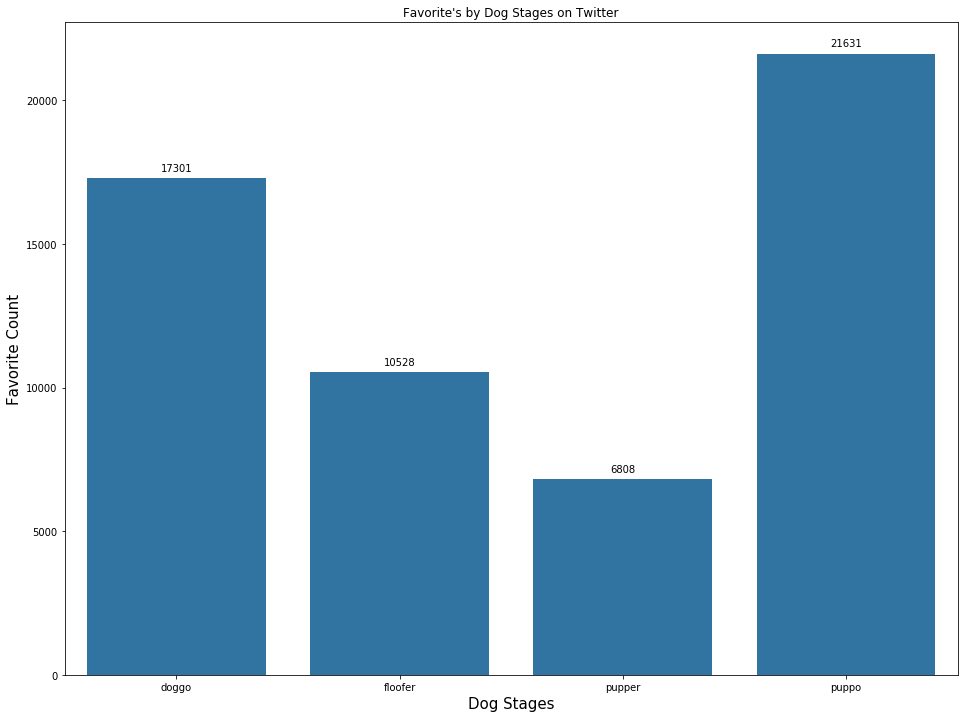

In [93]:
# On twitter which dog stage has more faviourites on average?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]
splot = sb.barplot(x="growth_stage", y="favorite_count", data=twitter_av_favsstages_df, ci=None, order=['doggo', 'floofer', 'pupper', 'puppo'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Dog Stages")
plt.ylabel("Favorite Count")
plt.title("Favorite's by Dog Stages on Twitter")
plt.show()

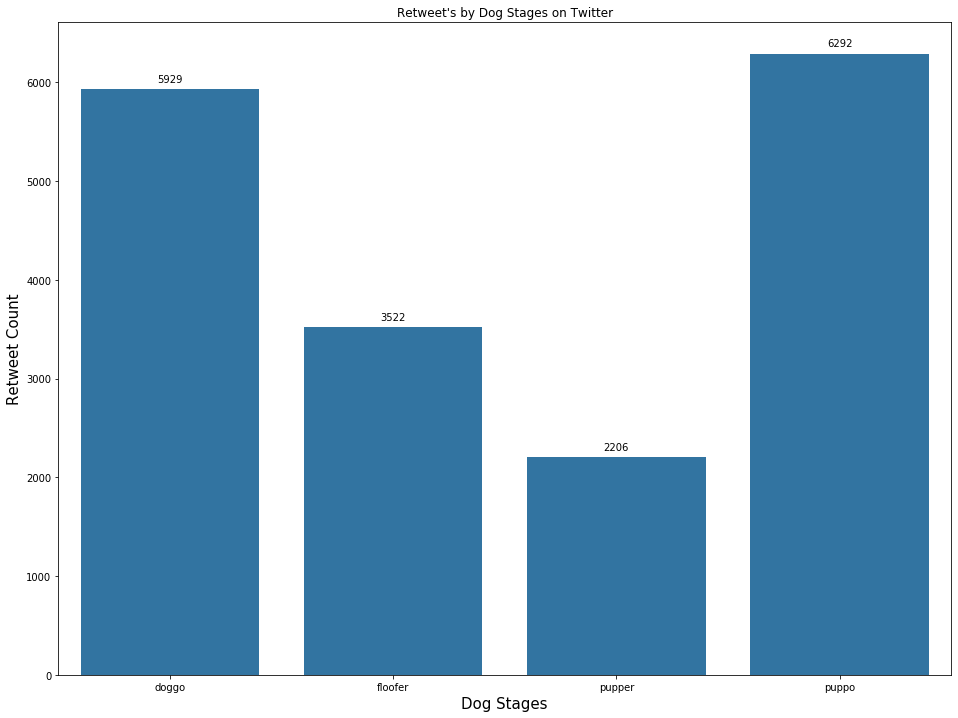

In [92]:
# On twitter which dog stage has high retweets on average?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]
splot = sb.barplot(x="growth_stage", y="retweet_count", data=twitter_av_favsstages_df, ci=None, order=['doggo', 'floofer', 'pupper', 'puppo'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Dog Stages")
plt.ylabel("Retweet Count")
plt.title("Retweet's by Dog Stages on Twitter")
plt.show()

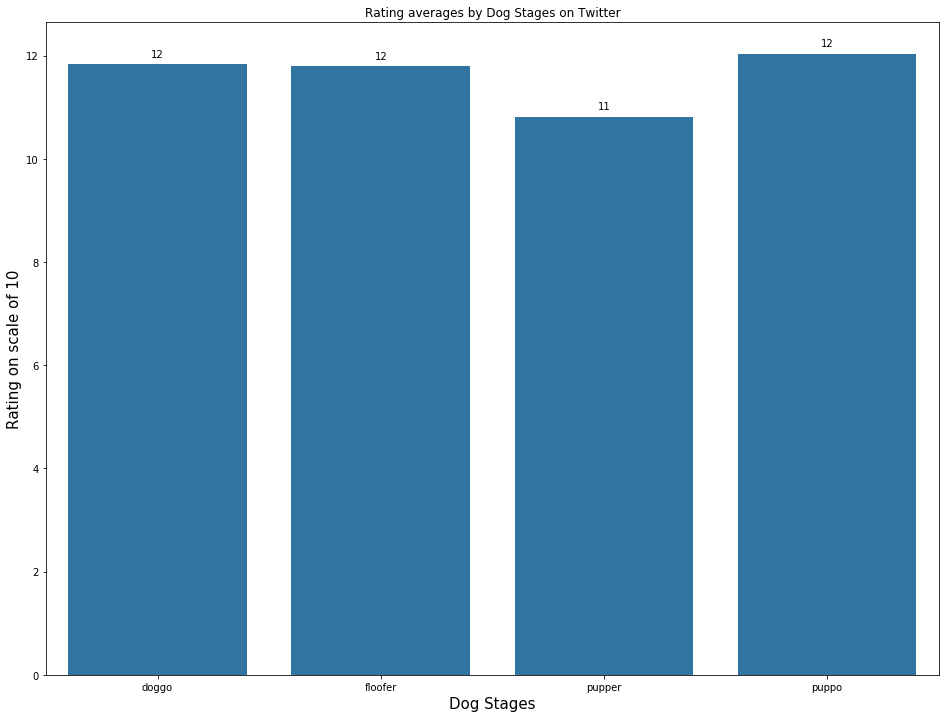

In [94]:
# How are the dogs rated by their stages?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]

splot = sb.barplot(x="growth_stage", y="rating_numerator", data=twitter_av_favsstages_df, ci=None, order=['doggo', 'floofer', 'pupper', 'puppo'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel("Dog Stages")
plt.ylabel("Rating on scale of 10")
plt.title("Rating averages by Dog Stages on Twitter")
plt.show()

In [67]:
twitter_av_favsstages_df.rating_numerator.describe(percentiles=[0.95])

count    2110.000000
mean       12.245972
std        40.342038
min         0.000000
50%        11.000000
95%        13.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [59]:
twitter_av_favs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2109
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2110 non-null   int64              
 1   timestamp           2110 non-null   datetime64[ns, UTC]
 2   source              2110 non-null   object             
 3   text                2110 non-null   object             
 4   expanded_urls       2110 non-null   object             
 5   rating_numerator    2110 non-null   int64              
 6   rating_denominator  2110 non-null   int64              
 7   name                2110 non-null   object             
 8   doggo               2110 non-null   object             
 9   floofer             2110 non-null   object             
 10  pupper              2110 non-null   object             
 11  puppo               2110 non-null   object             
 12  favorite_count      2110 non-null 

In [66]:
twitter_av_favs_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2027.0,2100.0,1878.0,2086.0
doggo,83.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,232.0,NaN
puppo,NaN,NaN,NaN,24.0


In [64]:
twitter_av_favs_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,favorite_count,retweet_count,dog_stage,value
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,35727,7547,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,30867,5597,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,23212,3706,doggo,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,39015,7731,doggo,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,37264,8334,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...
8435,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,96,40,puppo,None
8436,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,a,265,127,puppo,None
8437,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,a,111,40,puppo,None
8438,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,a,120,42,puppo,None


In [60]:
twitter_av_favs_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,35727,7547
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,30867,5597
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,23212,3706
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,39015,7731
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,37264,8334


In [19]:
tweet_av_df[tweet_av_df.retweeted_status_timestamp.notna()][['tweet_id', 'timestamp', 'retweeted_status_timestamp']]

,tweet_id,timestamp,retweeted_status_timestamp
19,888202515573088257,2017-07-21 01:02:36+00:00,2017-07-19 00:47:34 +0000
32,886054160059072513,2017-07-15 02:45:48+00:00,2017-07-15 02:44:07 +0000
36,885311592912609280,2017-07-13 01:35:06+00:00,2017-02-12 01:04:29 +0000
68,879130579576475649,2017-06-26 00:13:58+00:00,2017-06-23 01:10:23 +0000
73,878404777348136964,2017-06-24 00:09:53+00:00,2017-06-23 16:00:04 +0000
...,...,...,...
1023,746521445350707200,2016-06-25 01:52:36+00:00,2015-11-21 00:46:50 +0000
1043,743835915802583040,2016-06-17 16:01:16+00:00,2015-11-19 00:32:12 +0000
1242,711998809858043904,2016-03-21 19:31:59+00:00,2016-03-21 19:29:52 +0000
2259,667550904950915073,2015-11-20 03:51:52+00:00,2015-11-20 03:43:06 +0000


In [6]:
tweet_av_df[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [5]:
image_pred_df[image_pred_df.duplicated(['jpg_url'], keep=False)].sort()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


In [ ]:
tweets_data = []
with open('tweets.json', errors='ignore') as tweets:
    for line in tweets:
        #print(json.loads(json.dumps(line)))
        tweets_data.append(json.loads(json.dumps(line)))
tweets_df = pd.DataFrame(tweets_data)
tweets_df.head()

In [ ]:
from pandas.io.json import json_normalize
twt_dt = {}
with open('tweets.json', errors='ignore') as tweets:
    for line in tweets:
        twt_dt.append(json_normalize(json.loads(line)))
        #twt_dict = json.loads(line)
        #print(json_normalize(twt_dict))        
cmpd_df = pd.DataFrame.from_records(twt_dt)
cmpd_df.head()
#print(tweets_data[0])
#json_normalize(tweets_data[0])



In [ ]:
from pandas.io.json import json_normalize
df = json_normalize([json.loads(x) for x in open('tweets.json').readlines()])
print (df)

In [ ]:
df = pd.DataFrame()
row_df=[]
with open('tweets.json') as f:
    for l in f:
        try:
            df. = json_normalize(json.loads(l))
            row_df.append(df)
        except:
            pass
dt = pd.concat(row_df)
dt.head()
#dfA.head()

In [ ]:
df.info()

In [ ]:
dt.columns

In [ ]:
data = []
with open('tweets.json','r') as f:
    for l in f:
        try:
            data.append(json_normalize(json.loads(l)))
        except:
            pass
print(type(data[0]))
df = pd.DataFrame.from_dict(map(dict,data))
pd.DataFrame.join()
df.head()

In [ ]:
df.columns[pd.Series(df.columns).str.contains("favorite_count")]

In [ ]:
df.columns[pd.Series(df.columns).str.contains("retweet_count")]

In [ ]:
df[['favorite_count']].info()

In [ ]:
df[['retweet_count']].info()

In [ ]:
df[['id']].info()

In [ ]:
df[['retweet_count']]

In [ ]:
df[['id']]

In [ ]:
df[['favorite_count']]

In [ ]:
df[['id','favorite_count', 'retweet_count']].head()

In [4]:
def is_json_key_present(json, key):
    try:
        buf = json[key]
    except KeyError:
        return False

    return True

column_names = ["tweet_id", "favorite_count", "retweet_count"]
list_vals = []
with open('tweet-json.txt','r') as f:
    for l in f:
        try:
            myjson = json.loads(l)
            if (is_json_key_present(myjson,'id') and  is_json_key_present(myjson,'favorite_count') and is_json_key_present(myjson,'retweet_count')):
                vals = [myjson['id'], myjson['favorite_count'], myjson['retweet_count']]
                list_vals.append(vals)
            else:
                print('Skipping row as there is no data')
        except:
            pass
mydf = pd.DataFrame(list_vals, columns=column_names)
mydf.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [ ]:
mydf.info()

In [ ]:
twitter_archive_favs_df =  tweet_av_df.merge(mydf, on='tweet_id')

In [ ]:
twitter_archive_master_df.head()

In [ ]:
twitter_archive_master_df.info()

In [ ]:
del(twitter_archive_master_df)

In [ ]:
twitter_archive_master_df = twitter_archive_favs_df.merge(image_pd_df, on='tweet_id')

In [ ]:
twitter_archive_master_df.info()

In [134]:
twitter_archive_master_df.to_csv('twitter_archive_master.csv')

In [6]:
tweet_av_df[tweet_av_df.rating_numerator > 12 ].text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
3       This is Darla. She commenced a snooze mid meal...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
                              ...                        
2037    This is the best thing I've ever seen so sprea...
2074    After so many requests... here you go.\n\nGood...
2172    Just got home from college. Dis my dog. She do...
2212    Never forget this vine. You will not stop watc...
2228    This is Jareld. Jareld rules these waters. Lad...
Name: text, Length: 433, dtype: object

In [7]:
tweet_av_df.columns[tweet_av_df.isnull().any()]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls'],
      dtype='object')

In [8]:
tweet_av_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
image_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
tweet_av_df[tweet_av_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
tweet_av_df.rating_numerator.sort_values(ascending=False).head(30)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
Name: rating_numerator, dtype: int64

In [35]:
int(np.rint(np.log2(165)))

7

In [24]:
tweet_av_df[tweet_av_df.rating_numerator > 100][['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
188,420,10
189,666,10
290,182,10
313,960,0
902,165,150
979,1776,10
1120,204,170
1634,143,130
1635,121,110
1779,144,120


In [17]:
tweet_av_df.rating_numerator.sort_values().head(30)

315     0
1016    0
2335    1
2261    1
2338    1
605     1
1446    1
1869    1
2091    1
2038    1
1940    1
1764    2
2310    2
1761    2
1920    2
2246    2
2237    2
2349    2
2326    2
2079    2
2305    3
1249    3
1898    3
1478    3
1692    3
2202    3
765     3
1928    3
1314    3
2183    3
Name: rating_numerator, dtype: int64

In [36]:
tweet_av_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [37]:
tweet_av_df.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [40]:
tweet_av_df.query('doggo != "None" and  floofer != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [43]:
 tweet_av_df.query('doggo != "doggo" and  floofer != "floofer" and pupper != "pupper" and puppo != "puppo" ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [44]:
list(tweet_av_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [47]:
all_columns = pd.Series(list(tweet_av_df) + list(image_pd_df) + list(mydf))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [48]:
list(mydf)

['tweet_id', 'favorite_count', 'retweet_count']

In [10]:
def collecttweetdata(id):
    consumer_key = 'AeFxgKcFhsENzkKD8MfoMPoA9'
    consumer_secret = 'PErJwUZAwfmLBzZKyWBNwOpprGbUNsrro167rBYZ04JmzqmSqx'
    auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
    api = tweepy.API(auth)
    try:
        status = api.get_status(id, tweet_mode="extended")
        print(status)
        return status
    except tweepy.TweepError as e:
        print("Fail", e)
        pass


In [18]:
tweet_av_df.shape

(2356, 17)